<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:

# Reshape the data
data = pd.DataFrame(boston_df.values.reshape(-1, 14), columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
])

# Display basic information and first few rows
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task 2: Generate Basic Statistics and Visualizations


In [9]:
# Display basic statistics
basic_stats = data.describe()
basic_stats


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


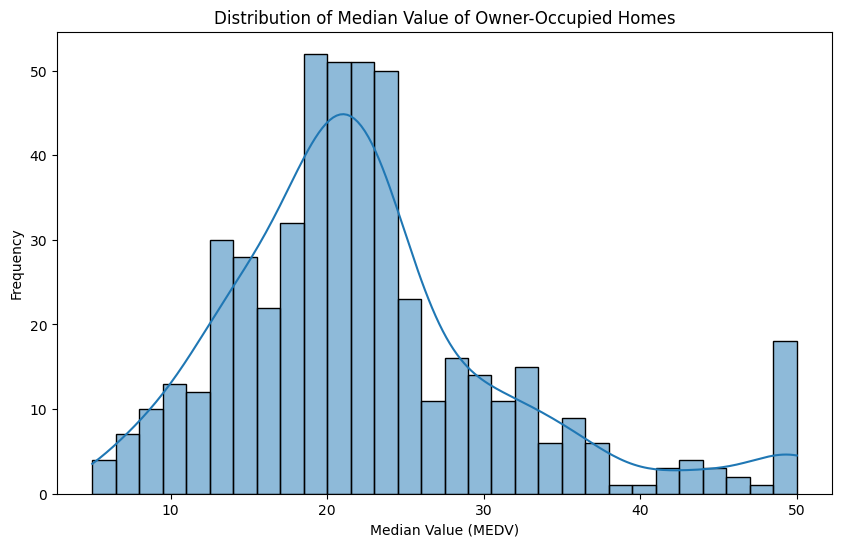

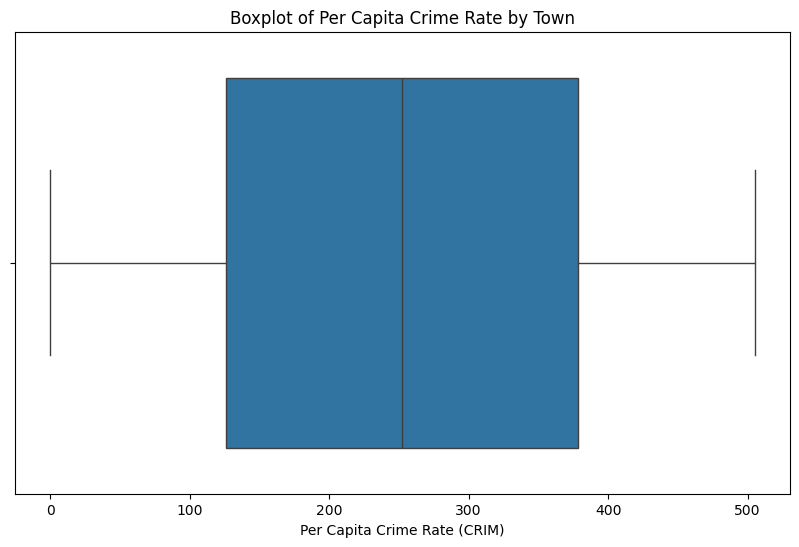

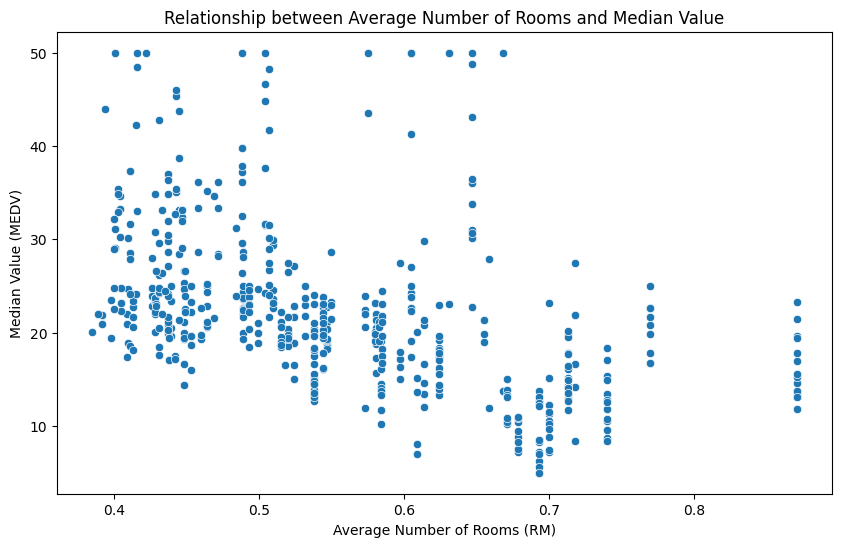

In [12]:
# visualisation
# Histogram for MEDV (Median value of owner-occupied homes)
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (MEDV)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for CRIM (Per capita crime rate by town)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['CRIM'])
plt.title('Boxplot of Per Capita Crime Rate by Town')
plt.xlabel('Per Capita Crime Rate (CRIM)')
plt.show()

# Scatter plot for RM (Average number of rooms per dwelling) vs. MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Relationship between Average Number of Rooms and Median Value')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV)')
plt.show()


task 3

In [29]:
# 1 Difference in Median Value of Houses Bounded by the Charles River

has_yes = data[data['CHAS'] == 1]['MEDV']
chas_no = data[data['CHAS'] == 0]['MEDV']
t_stat, p_val = stats.ttest_ind(chas_yes, chas_no)

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_val}")
if p_val < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River.")


T-Test Results: t-statistic = nan, p-value = nan
We fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River.


In [26]:
# 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

data['AGE_Group'] = pd.cut(data['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
model = smf.ols('MEDV ~ C(AGE_Group)', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print(anova_result)
if anova_result['PR(>F)'][0] < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the median values of houses across different age groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the median values of houses across different age groups.")







/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  warnings.warn('covariance of constraints does not have full '


                    sum_sq     df   F  PR(>F)
C(AGE_Group)           NaN    4.0 NaN     NaN
Residual      42716.295415  505.0 NaN     NaN
We fail to reject the null hypothesis. There is no significant difference in the median values of houses across different age groups.


In [27]:
# Question 3: Pearson Correlation
corr_coef, corr_p_val = stats.pearsonr(data['NOX'], data['INDUS'])

print(f"Correlation Results: correlation coefficient = {corr_coef}, p-value = {corr_p_val}")
if corr_p_val < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("We fail to reject the null hypothesis. There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")



Correlation Results: correlation coefficient = -0.04269671929612193, p-value = 0.3378103047858007
We fail to reject the null hypothesis. There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [28]:
# Question 4: Regression analysis
X = sm.add_constant(data['DIS'])
model = sm.OLS(data['MEDV'], X).fit()

print(model.summary())
dis_p_val = model.pvalues['DIS']
if dis_p_val < 0.05:
    print("We reject the null hypothesis. The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.")
else:
    print("We fail to reject the null hypothesis. The weighted distance to the five Boston employment centers has no significant impact on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           1.57e-18
Time:                        17:59:21   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.0